In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,delimiter=";")
data.head()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [348]:
#classifying the given quality as Low/High 
#replacing the given quality with low & High values
data['quality'] = np.where(data['quality']<=5 , 'Low', 'High')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


In [349]:
#normalises the numeric values in given dataset(df) with the max and min values from trainf data
def normalize(df,trainf):
    result = df.copy()
    for feature_name in df.columns:
        if np.issubdtype(df[feature_name].dtype, np.number):
            max_value = trainf[feature_name].max()
            min_value = trainf[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [350]:
# sampling data with 75%train data and 25% test data
train_df = data.sample(frac = 0.75, random_state = 150)
test_df = data.drop(train_df.index)

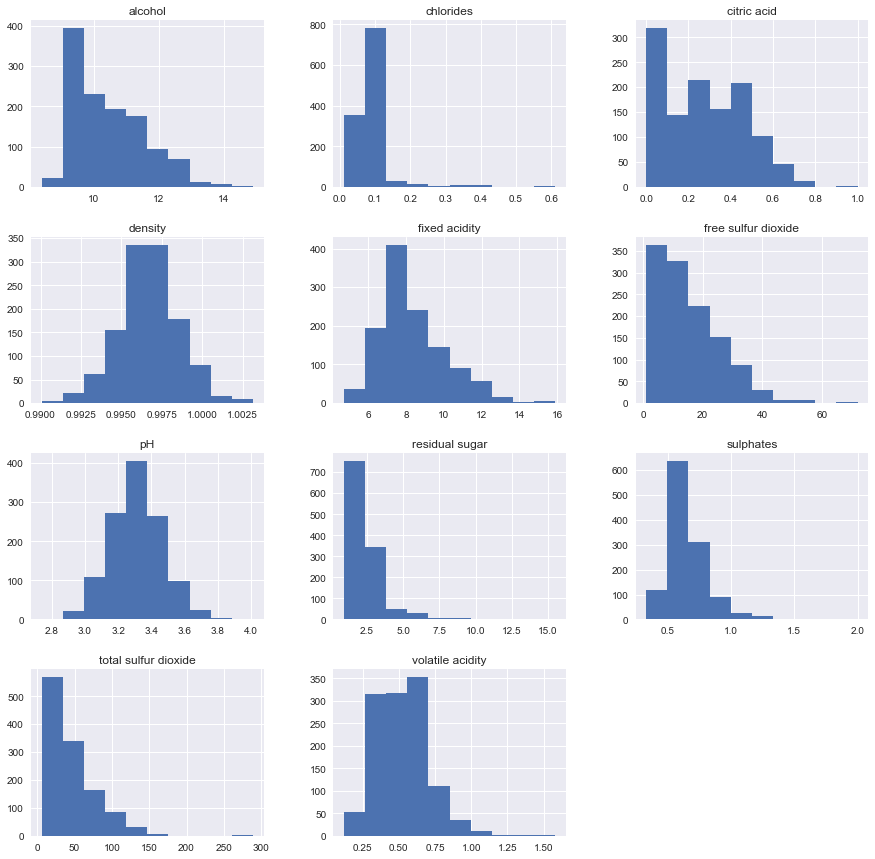

In [351]:
pd.DataFrame.hist(train_df.drop('quality',1), figsize = [15,15]);
plt.show()

In [352]:
train = normalize(train_df, train_df) # normalise train data
test = normalize(test_df,train_df) # normalise test data with max and min values from train data
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
559,0.741071,0.239726,0.49,0.232877,0.121870,0.070423,0.144876,0.919725,0.440945,0.209581,0.661538,High
843,0.214286,0.386986,0.35,0.075342,0.126878,0.112676,0.303887,0.476300,0.425197,0.173653,0.153846,Low
219,0.276786,0.280822,0.33,0.102740,0.113523,0.323944,0.487633,0.495413,0.440945,0.161677,0.169231,Low
69,0.294643,0.400685,0.05,0.068493,0.103506,0.098592,0.045936,0.468654,0.472441,0.371257,0.323077,High
1543,0.571429,0.219178,0.42,0.089041,0.086811,0.183099,0.045936,0.574159,0.401575,0.143713,0.307692,High


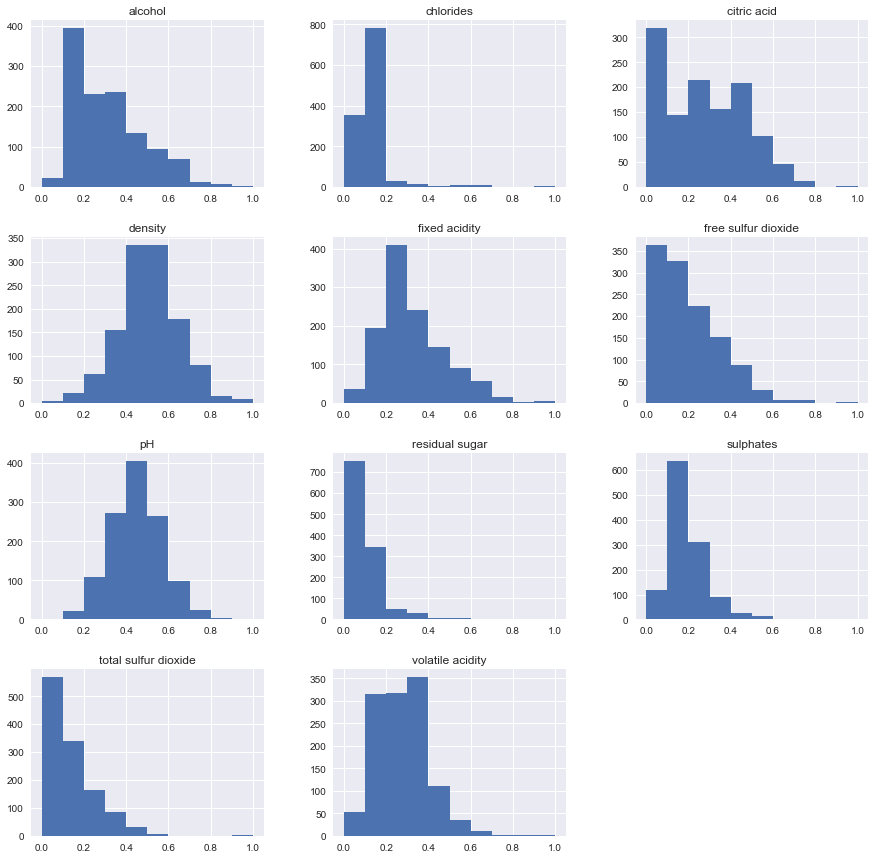

In [353]:
#histogram after normalising data
pd.DataFrame.hist(train.drop('quality',1), figsize = [15,15]);
plt.show()

In [354]:
cols = set(test.columns)
cols.remove('quality')
test_cols = list(cols)
test_cols # collecting columns to compute the distance

['alcohol',
 'total sulfur dioxide',
 'sulphates',
 'residual sugar',
 'volatile acidity',
 'citric acid',
 'fixed acidity',
 'pH',
 'chlorides',
 'density',
 'free sulfur dioxide']

In [361]:
import math
from sklearn.metrics.pairwise import euclidean_distances
#calculate distance between two given rows
def calculate_distance(test_row, train_row):
    sumR = test_row-train_row
    sumR = pow(sumR,2)
    return math.sqrt(sumR.sum())
    
#calculates the distances of each record in test data with all the record in training data    
def calculate_knn(test_row, train_data):
    tData = train_data.copy()
    tData['distance'] = tData[test_cols].apply(lambda row: calculate_distance(row,test_row),axis =1)
    tData = tData.sort_values(['distance'], ascending = 1 )
    top = tData.head(35)
    res = ' '.join(top['quality'].tolist())
    return res #return a record containing top 34 values appened e.g High Low Low High... 

In [362]:
#save the closest 35 results of each test record in result column as a string
test['result'] = test[test_cols].apply(lambda row: calculate_knn(row,train),axis =1)

In [363]:
test['result'].head()

5     Low Low Low Low Low Low Low High High High Low...
9     Low Low Low Low Low High Low High Low Low Low ...
13    Low High Low Low Low High High Low High High L...
15    Low Low Low Low Low Low Low Low Low Low Low Lo...
18    Low High High Low Low Low Low Low High High Hi...
Name: result, dtype: object

In [364]:
#calculates the result of every row based in k value
def calculate_k(k,row):
    top = row.split()
    c = top[:k].count('Low')
    if c > k/2:
        return 'Low'
    return 'High'

In [365]:
kdf = pd.DataFrame(columns=[ 'k value','accuracy' ])
# for k = 5:35 compute the accuracy to get the best k value
for i in range(5, 35, 2):
    test['result_k'] = test['result'].apply(lambda row: calculate_k(i,row))
    c = (test['result_k']==test['quality']).sum()
    c = c/len(test)
    kdf = kdf.append({'k value': i, 'accuracy': c}, ignore_index=True)

print(kdf.to_string(index=False))

k value  accuracy
    5.0    0.7425
    7.0    0.7400
    9.0    0.7425
   11.0    0.7475
   13.0    0.7575
   15.0    0.7600
   17.0    0.7400
   19.0    0.7425
   21.0    0.7425
   23.0    0.7425
   25.0    0.7325
   27.0    0.7250
   29.0    0.7225
   31.0    0.7300
   33.0    0.7350


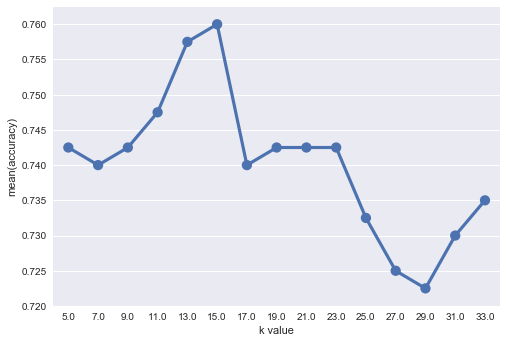

In [366]:
import seaborn as sns
sns.pointplot(x='k value', y='accuracy', data=kdf)
plt.show()

In [367]:
kdf.loc[kdf['accuracy'].idxmax()]
kdf

,k value,accuracy
0,5.0,0.7425
1,7.0,0.7400
2,9.0,0.7425
3,11.0,0.7475
4,13.0,0.7575
5,15.0,0.7600
6,17.0,0.7400
7,19.0,0.7425
8,21.0,0.7425
9,23.0,0.7425


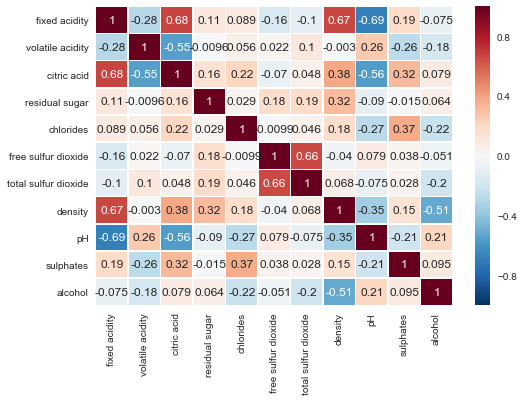

In [368]:
#computing the correlation between various features
correlation = train.corr()
sns.heatmap(correlation, annot= True, linewidths=.5)
plt.show()

In [369]:
#eliminating the columns that are highly correlated
test_cols.remove('density')
test_cols.remove('free sulfur dioxide')
test_cols.remove('citric acid')

In [370]:
#calculating the distances with feature reduction
test['result subset'] = test[test_cols].apply(lambda row: calculate_knn(row,train),axis =1)

In [371]:
#calculating accuracy after feature reduction
test['result_ks'] = test['result subset'].apply(lambda row: calculate_k(15,row))
c = (test['result_ks']==test['quality']).sum()
c = c/len(test)
c

0.75

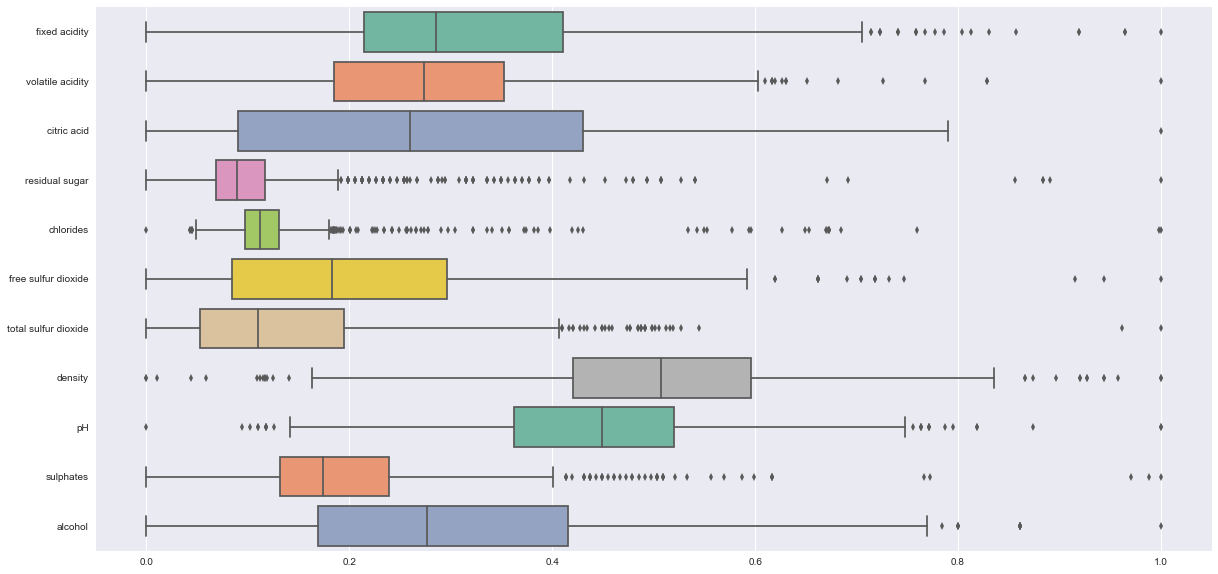

In [372]:
#determining outliers
fig2, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.boxplot(data=train, orient="h", palette="Set2", ax = ax2)
plt.show()

In [373]:
#calculating the interquartile region values to determine the maximum and minimum value of boxplots
q75 = train.quantile(.75)
q25 = train.quantile(.25)
iqr = q75 - q25

minc = q25 - (iqr*1.5)
maxc = q75 + (iqr*1.5)

In [374]:
cols = set(train.columns)
cols.remove('quality')
test_cols = list(cols)
test_cols

['alcohol',
 'total sulfur dioxide',
 'sulphates',
 'residual sugar',
 'volatile acidity',
 'citric acid',
 'fixed acidity',
 'pH',
 'chlorides',
 'density',
 'free sulfur dioxide']

In [375]:
#replaces the outliers with closest min/max values
def replace_outlier(row, maxv, minv):
    if row > maxv:
        return maxv
    elif row < minv:
        return minv
    else:
        return row
    
    

In [376]:
#transforming the training data by replacing the outliers with approximate values
train2 = train
for col in test_cols:
    train2[col] =train[col].apply(lambda row: replace_outlier(row,maxc[col], minc[col]))


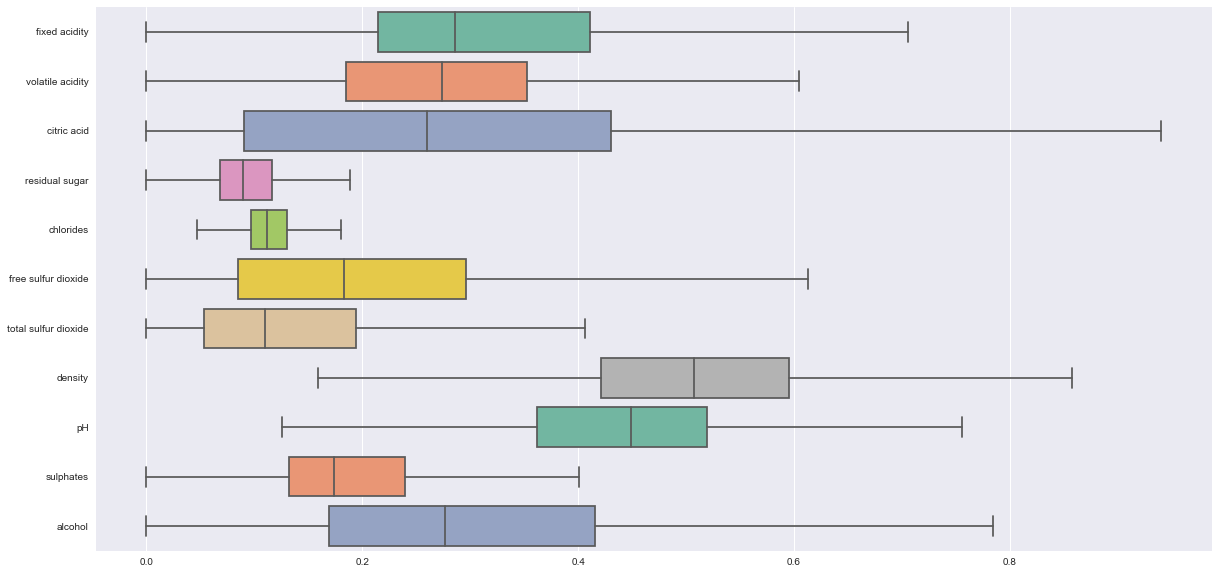

In [377]:
#plot after the removal of outliers
fig2, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.boxplot(data=train2, orient="h", palette="Set2", ax = ax2)
plt.show()

In [378]:
#calculating the distances
test['result-outliers'] = test[test_cols].apply(lambda row: calculate_knn(row,train2),axis =1)

In [379]:
#assigning result after approximation of outliers with final_k
test['result_o'] = test['result-outliers'].apply(lambda row: calculate_k(15,row))
c = (test['result_o']==test['quality']).sum()
c = c/len(test)
c

0.77249999999999996

In [380]:
def calulateProbability(row,k):
    top = row.split()
    c = top[:k].count('High')
    return c/k
    
    

In [381]:
#printing result with k =15
result_df = pd.DataFrame(columns=[ 'Actual Class','Predicted Class','Posterier Probability'])
for index, row  in test.iterrows():
    result_df = result_df.append({'Actual Class': row['quality'], 'Predicted Class': row['result_o'],'Posterier Probability':calulateProbability(row['result-outliers'],15)},ignore_index=True)
result_df

,Actual Class,Predicted Class,Posterier Probability
0,Low,Low,0.333333
1,Low,Low,0.400000
2,Low,Low,0.400000
3,Low,Low,0.000000
4,Low,Low,0.466667
5,High,Low,0.400000
6,Low,Low,0.333333
7,Low,Low,0.333333
8,Low,Low,0.266667
9,High,Low,0.333333


In [382]:
from sklearn.metrics import confusion_matrix
tp, fn, fp, tn = confusion_matrix(result_df['Actual Class'],result_df['Predicted Class']).ravel()

In [383]:
#output for various values of k
def results_K(tp,fp,fn,tn):
    print("True Positive:       ",tp)
    print("False Positive:      ",fp)
    print("True Negative:       ",tn)
    print("False Negative:      ",fn)
    r = tp/(tp+fp)
    print("Precision:           ",r)
    p = tp/(tp+fn)
    print("Recall:              ",p)
    print("F-Measure:           ",2*r*p/(r+p))
    correct = tp+tn
    incorrect = fp+fn
    print("Classification rate: ",correct/(correct+incorrect))
    print("Error rate:          ",incorrect/(correct+incorrect))
    
    

-----------------------------
K VALUE   =   5
-----------------------------
True Positive:        159
False Positive:       42
True Negative:        141
False Negative:       58
Precision:            0.791044776119
Recall:               0.732718894009
F-Measure:            0.760765550239
Classification rate:  0.75
Error rate:           0.25
-----------------------------


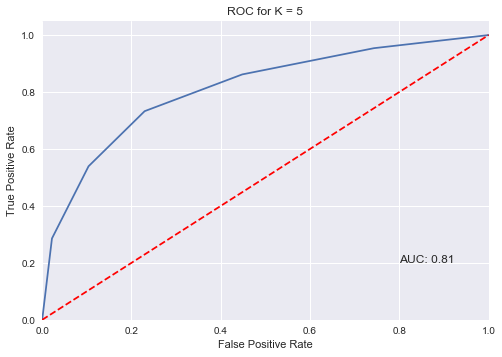

-----------------------------
K VALUE   =   11
-----------------------------
True Positive:        161
False Positive:       40
True Negative:        143
False Negative:       56
Precision:            0.800995024876
Recall:               0.741935483871
F-Measure:            0.77033492823
Classification rate:  0.76
Error rate:           0.24
-----------------------------


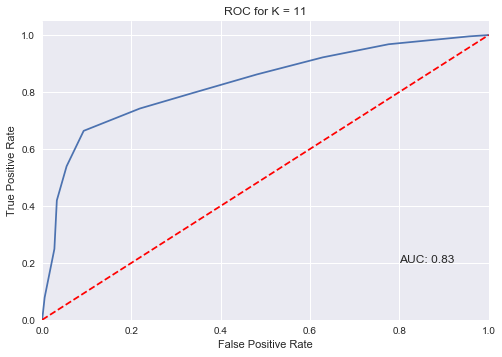

-----------------------------
K VALUE   =   15
-----------------------------
True Positive:        161
False Positive:       35
True Negative:        148
False Negative:       56
Precision:            0.821428571429
Recall:               0.741935483871
F-Measure:            0.779661016949
Classification rate:  0.7725
Error rate:           0.2275
-----------------------------


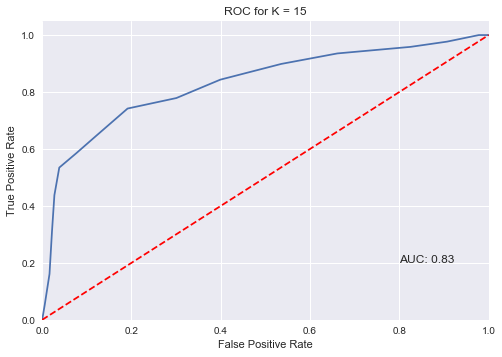

-----------------------------
K VALUE   =   29
-----------------------------
True Positive:        154
False Positive:       42
True Negative:        141
False Negative:       63
Precision:            0.785714285714
Recall:               0.709677419355
F-Measure:            0.745762711864
Classification rate:  0.7375
Error rate:           0.2625
-----------------------------


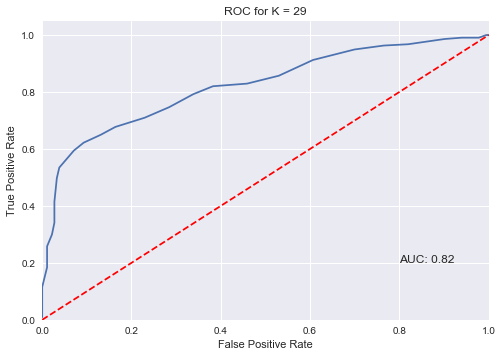

In [384]:
from sklearn import metrics
k_values = [5,11,15,29]
for k in k_values:
    res_temp = pd.DataFrame(columns=[ 'Actual Class','Predicted Class','Posterier Probability'])
    print("-----------------------------")
    print("K VALUE   =  ",k)
    for index, row  in test.iterrows():
        res_temp = res_temp.append({'Actual Class': row['quality'], 'Predicted Class': calculate_k(k,row['result-outliers']),'Posterier Probability':calulateProbability(row['result-outliers'],k)},ignore_index=True)
    tp, fn, fp, tn = confusion_matrix(res_temp['Actual Class'],res_temp['Predicted Class']).ravel()
    print("-----------------------------")
    results_K(tp,fp,fn,tn)
    print("-----------------------------")
    res_temp['Actual Class'] = np.where(res_temp['Actual Class']== 'High',1,0)
    auc = metrics.roc_auc_score(res_temp['Actual Class'],res_temp['Posterier Probability'])
    fpr, tpr, thresholds = metrics.roc_curve(res_temp['Actual Class'],res_temp['Posterier Probability'], pos_label=1)
    ax = plt.axes()
    ax.plot(fpr, tpr)
    ax.annotate('AUC: {:.2f}'.format(auc), (.8, .2))
    ax.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for K = %i' %k)
    plt.show() 


In [385]:
cols = set(train.columns)
cols.remove('quality')
cols

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

In [389]:
#off the shelf knn implementation
from sklearn.neighbors import KNeighborsClassifier

for i in range(5, 35, 2):
    # instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model
    knn.fit(train[list(cols)], train['quality'])

    # predict the response
    pred = knn.predict(test[list(cols)])


    pdf = pd.DataFrame()
    pdf['quality'] = pred.tolist()
    c = (pdf['quality'].reset_index(drop=True) ==test['quality'].reset_index(drop=True)).sum()
    print("off the shelf knn accuracy: with ",i," = ", c/len(test))



off the shelf knn accuracy: with  5  =  0.75
off the shelf knn accuracy: with  7  =  0.75
off the shelf knn accuracy: with  9  =  0.7525
off the shelf knn accuracy: with  11  =  0.76
off the shelf knn accuracy: with  13  =  0.755
off the shelf knn accuracy: with  15  =  0.7725
off the shelf knn accuracy: with  17  =  0.7625
off the shelf knn accuracy: with  19  =  0.76
off the shelf knn accuracy: with  21  =  0.755
off the shelf knn accuracy: with  23  =  0.75
off the shelf knn accuracy: with  25  =  0.745
off the shelf knn accuracy: with  27  =  0.7425
off the shelf knn accuracy: with  29  =  0.7375
off the shelf knn accuracy: with  31  =  0.745
off the shelf knn accuracy: with  33  =  0.745


In [391]:
#off the shelf results with k=15
knn = KNeighborsClassifier(n_neighbors=15)

# fitting the model
knn.fit(train[list(cols)], train['quality'])

# predict the response
pred = knn.predict(test[list(cols)])


pdf = pd.DataFrame()
pdf['quality'] = pred.tolist()
c = (pdf['quality'].reset_index(drop=True) ==test['quality'].reset_index(drop=True)).sum()
print("off the shelf knn accuracy: with 15 = ", c/len(test))

tp, fn, fp, tn = confusion_matrix(test['quality'],pdf['quality']).ravel()
results_K(tp,fp,fn,tn)

off the shelf knn accuracy: with 15 =  0.7725
True Positive:        161
False Positive:       35
True Negative:        148
False Negative:       56
Precision:            0.821428571429
Recall:               0.741935483871
F-Measure:            0.779661016949
Classification rate:  0.7725
Error rate:           0.2275
